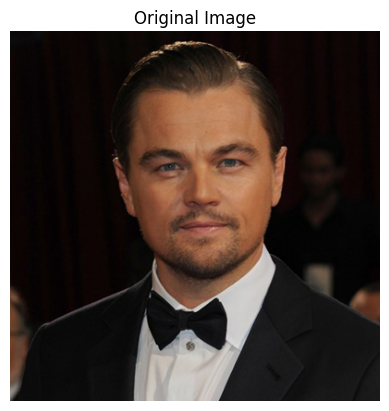

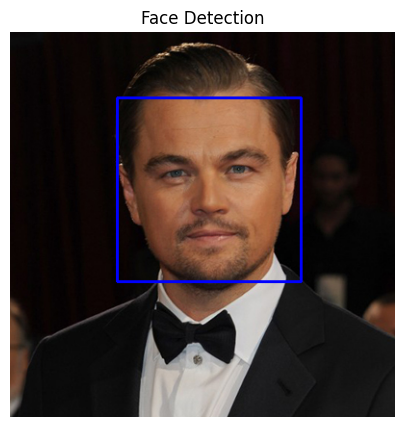

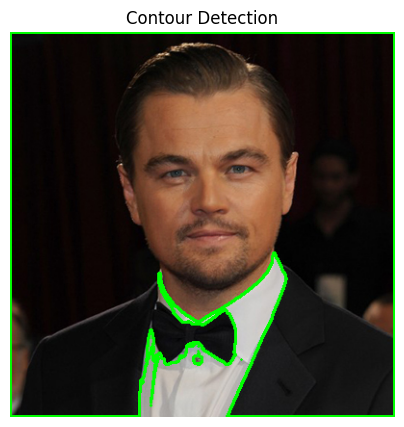

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('object.jpg')
image = cv2.imread('image.jpg')

# Convert BGR to RGB for proper display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply some basic processing
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, binary_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Morphological operations
kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel)
morph_close = cv2.morphologyEx(binary_thresh, cv2.MORPH_CLOSE, kernel)

# Edge detection
sobel_edges = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
laplacian_edges = cv2.Laplacian(gray, cv2.CV_64F)

def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

image_faces = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_faces, (x, y), (x + w, y + h), (255, 0, 0), 2)

show_image("Face Detection", cv2.cvtColor(image_faces, cv2.COLOR_BGR2RGB), cmap=None)

# Contour detection
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

show_image("Contour Detection", cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB), cmap=None)
